<a href="https://colab.research.google.com/github/israel-sahar/DeepLearning--Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Musical Instruments Classification***

| Sahar Israel 205654536 

| Avi Bechavod 200675981

| Harel Yada'n 207331125 



**1.** First, we will install neccesary packages for this project.

In [1]:
pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=9b4e641921adeddf9d0a726561044e4b61c1798ad82134640c05e71b5be536b2
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


**2.** Now we will importing all required modules:

In [2]:
import os
import librosa
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from python_speech_features import mfcc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization
from keras.models import Sequential

**3.** read the table of all data.(we made the table in another section)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/deepLearning/project/train.csv')
df = df.iloc[: , 1:]

df

,fname,label,manually_verified
0,cello_A2_025_forte_arco-normal.wav,cello,1
1,cello_A2_025_fortissimo_arco-normal.wav,cello,1
2,cello_A2_025_mezzo-forte_arco-col-legno-battut...,cello,1
3,cello_A2_025_mezzo-piano_arco-normal.wav,cello,1
4,cello_A2_025_pianissimo_arco-normal.wav,cello,1
...,...,...,...
8349,drum_ff0fcdd1.wav,drum,1
8350,drum_ff11628d.wav,drum,1
8351,drum_ff3f21e7.wav,drum,1
8352,drum_ff720526.wav,drum,1


We have about 8354 samples of instruments

In [4]:
df.shape

(8354, 3)

**4.** Unzip all the samples from a zip that sit on the drive

In [5]:
!unzip /content/drive/MyDrive/deepLearning/project/all-samples.zip -d /content/all-samples/

Streaming output truncated to the last 5000 lines.
  inflating: /content/all-samples/cello/cello_Ds4_1_mezzo-piano_arco-major-trill.wav  
  inflating: /content/all-samples/cello/cello_Ds4_1_mezzo-piano_arco-normal.wav  
  inflating: /content/all-samples/cello/cello_Ds4_1_mezzo-piano_non-vibrato.wav  
  inflating: /content/all-samples/cello/cello_Ds4_1_pianissimo_arco-normal.wav  
  inflating: /content/all-samples/cello/cello_Ds5_025_forte_arco-normal.wav  
  inflating: /content/all-samples/cello/cello_Ds5_025_fortissimo_arco-normal.wav  
  inflating: /content/all-samples/cello/cello_Ds5_025_mezzo-piano_arco-normal.wav  
  inflating: /content/all-samples/cello/cello_Ds5_025_pianissimo_arco-normal.wav  
  inflating: /content/all-samples/cello/cello_Ds5_05_forte_arco-normal.wav  
  inflating: /content/all-samples/cello/cello_Ds5_05_fortissimo_arco-normal.wav  
  inflating: /content/all-samples/cello/cello_Ds5_05_mezzo-piano_arco-normal.wav  
  inflating: /content/all-samples/cello/cello_D

In [6]:
!unzip /content/drive/MyDrive/deepLearning/project/all-samples-drum-piano.zip -d /content/drum/

Archive:  /content/drive/MyDrive/deepLearning/project/all-samples-drum-piano.zip
   creating: /content/drum/drum/
  inflating: /content/drum/drum/drum_0038a046.wav  
  inflating: /content/drum/drum/drum_00780200.wav  
  inflating: /content/drum/drum/drum_00d40fa2.wav  
  inflating: /content/drum/drum/drum_00fcbab2.wav  
  inflating: /content/drum/drum/drum_01c2f88b.wav  
  inflating: /content/drum/drum/drum_024c4c6d.wav  
  inflating: /content/drum/drum/drum_03fc1f96.wav  
  inflating: /content/drum/drum/drum_0446a487.wav  
  inflating: /content/drum/drum/drum_04b4009f.wav  
  inflating: /content/drum/drum/drum_04e82f46.wav  
  inflating: /content/drum/drum/drum_04ecda67.wav  
  inflating: /content/drum/drum/drum_0513cbfc.wav  
  inflating: /content/drum/drum/drum_05309a38.wav  
  inflating: /content/drum/drum/drum_053e7bb5.wav  
  inflating: /content/drum/drum/drum_0638da1a.wav  
  inflating: /content/drum/drum/drum_066d40f4.wav  
  inflating: /content/drum/drum/drum_06a1dfc0.wav  
  

In [7]:
!unzip /content/drive/MyDrive/deepLearning/project/piano.zip -d /content/piano/

Archive:  /content/drive/MyDrive/deepLearning/project/piano.zip
   creating: /content/piano/piano/
  inflating: /content/piano/piano/piano_0_000000000.wav  
  inflating: /content/piano/piano/piano_0_000000001.wav  
  inflating: /content/piano/piano/piano_0_000000002.wav  
  inflating: /content/piano/piano/piano_0_000000003.wav  
  inflating: /content/piano/piano/piano_0_000000004.wav  
  inflating: /content/piano/piano/piano_0_000000005.wav  
  inflating: /content/piano/piano/piano_0_000000006.wav  
  inflating: /content/piano/piano/piano_0_000000007.wav  
  inflating: /content/piano/piano/piano_0_000000008.wav  
  inflating: /content/piano/piano/piano_0_000000009.wav  
  inflating: /content/piano/piano/piano_0_000000010.wav  
  inflating: /content/piano/piano/piano_0_000000011.wav  
  inflating: /content/piano/piano/piano_0_000000012.wav  
  inflating: /content/piano/piano/piano_0_000000013.wav  
  inflating: /content/piano/piano/piano_0_000000014.wav  
  inflating: /content/piano/pia

Remember to copy the drum and piano folder to all-samples folder

In [8]:
!mv /content/piano/piano /content/all-samples
!mv /content/drum/drum /content/all-samples

**5.** we will load those actual audio files using the following approach:

we load the actual sample and append them to a Nampy list

Take about 15 minutes...

In [9]:
path = '/content/all-samples/'

audio_data = list()
for i in tqdm(range(df.shape[0])):
    audio_data.append(librosa.load(path+df['label'].iloc[i]+'/'+df['fname'].iloc[i]))
    
audio_data = np.array(audio_data)


100%|██████████| 8354/8354 [11:27<00:00, 12.15it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


**6.** Now we will put the content of audio_data variable into data frame df which can be done using the following code:

In [10]:
df['audio_waves'] = audio_data[:,0]
df['samplerate'] = audio_data[:,1]
df

,fname,label,manually_verified,audio_waves,samplerate
0,cello_A2_025_forte_arco-normal.wav,cello,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
1,cello_A2_025_fortissimo_arco-normal.wav,cello,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
2,cello_A2_025_mezzo-forte_arco-col-legno-battut...,cello,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
3,cello_A2_025_mezzo-piano_arco-normal.wav,cello,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
4,cello_A2_025_pianissimo_arco-normal.wav,cello,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
...,...,...,...,...,...
8349,drum_ff0fcdd1.wav,drum,1,"[0.07149732, -0.08949754, 0.11635953, -0.17007...",22050
8350,drum_ff11628d.wav,drum,1,"[0.0015831549, 0.00063323136, 0.001410039, 0.0...",22050
8351,drum_ff3f21e7.wav,drum,1,"[0.0001434271, 0.00027471368, 0.00029650948, 0...",22050
8352,drum_ff720526.wav,drum,1,"[-0.021704905, -0.09383074, -0.36622468, -0.42...",22050


**7.** Adding bit length and second length for each sample:

the two new columns are called bit_lengths and second_lengths. bit_lengths is essentially just the number of bits in each audio waves, while second_lengths is the length of all audio files in seconds.

In [11]:
bit_lengths = list()
for i in range(df.shape[0]):
    bit_lengths.append(len(df['audio_waves'].iloc[i]))
    
bit_lengths = np.array(bit_lengths)
df['bit_lengths'] = bit_lengths
df['seconds_length'] = df['bit_lengths']/df['samplerate']

df.head()

,fname,label,manually_verified,audio_waves,samplerate,bit_lengths,seconds_length
0,cello_A2_025_forte_arco-normal.wav,cello,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,18432,0.835918
1,cello_A2_025_fortissimo_arco-normal.wav,cello,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,13824,0.626939
2,cello_A2_025_mezzo-forte_arco-col-legno-battut...,cello,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,14400,0.653061
3,cello_A2_025_mezzo-piano_arco-normal.wav,cello,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,18432,0.835918
4,cello_A2_025_pianissimo_arco-normal.wav,cello,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,13248,0.600816


**8.** For this project we will use samples above 1 second and generate 8000 samples

In [12]:
df = df[df['seconds_length'] >= 1]
df.shape

(3699, 7)

In [13]:
min_bits = np.min(df['bit_lengths'])
print(min_bits)

min_seconds = np.min(df['seconds_length'])
print(min_seconds)

22050
1.0


In [14]:
num_samples = 8000
generated_audio_waves = list()
generated_audio_labels = list()
for i in tqdm(range(num_samples)):
    try:
        chosen_file = np.random.choice(df['fname'].values)
        chosen_initial = np.random.choice(np.arange(0,df[df['fname']==chosen_file]['bit_lengths'].values-min_bits))
        generated_audio_waves.append(df[df['fname']==chosen_file]['audio_waves'].values[0][chosen_initial:chosen_initial+min_bits])
        
        generated_audio_labels.append(df[df['fname']==chosen_file]['label'].values)
    except ValueError:
        continue

generated_audio_waves = np.array(generated_audio_waves)
generated_audio_labels = np.array(generated_audio_labels)

100%|██████████| 8000/8000 [00:19<00:00, 414.76it/s]


In [15]:
generated_audio_waves.shape

(7991, 22050)

**9.** we can simply use a for loop to iterate through all the values of the array and convert each of the waves into MFCC features:

In [16]:
mfcc_features = list()

for i in tqdm(range(len(generated_audio_waves))):
    mfcc_features.append(mfcc(generated_audio_waves[i]))
    
mfcc_features = np.array(mfcc_features)

100%|██████████| 7991/7991 [00:47<00:00, 169.88it/s]


In [17]:
print(generated_audio_waves.shape)
print(mfcc_features.shape)

(7991, 22050)
(7991, 137, 13)


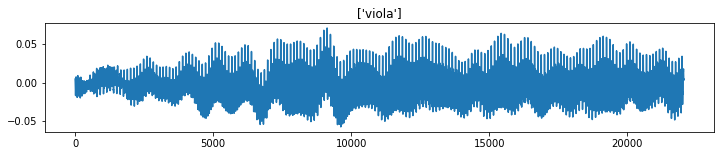

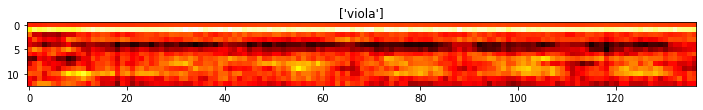

In [18]:
plt.figure(figsize=(12,2))
plt.plot(generated_audio_waves[4000])
plt.title(generated_audio_labels[4000])
plt.show()

plt.figure(figsize=(12, 2))
plt.imshow(mfcc_features[4000].T, cmap='hot')
plt.title(generated_audio_labels[4000])
plt.show()

We already got several variables by this far. Now, the two that we are going to use for model training are only mfcc_features (think of this as the X) and generated_audio_labels which contains all the labels (y) of each sample. In the next several steps we are going to actually train the model using these two variables (of course after encoding the label).

**10.** we still need to label-encode and one-hot-encode the labels of each sample

In [19]:
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(generated_audio_labels)
label_encoded = label_encoded[:, np.newaxis]
label_encoded

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[9],
       [1],
       [7],
       ...,
       [0],
       [3],
       [3]])

In [20]:
label_encoded.shape

(7991, 1)

**11.** Next, the values of label_encoeded will be converted into one hot representation.

In [21]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(label_encoded)
one_hot_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
one_hot_encoded.shape

(7991, 10)

**12.** the data are split into train and test in which the test size is taken from 20% of the entire dataset. This train-test split is important to find out whether our model suffers overfittingץ

In [23]:
X = mfcc_features
y = one_hot_encoded

X = (X-X.min())/(X.max()-X.min())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
y_test.shape

(1599, 10)

In [25]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [26]:
input_shape

(137, 13, 1)

We also need to reshape both X_train and X_test to be in that shape as well.

In [27]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print(X_train.shape)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print(X_test.shape)

(6392, 137, 13, 1)
(1599, 137, 13, 1)


**13.** Now it’s time to actually build the Convolutional Neural Network (CNN) classifier.

In [28]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 137, 13, 16)       160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 137, 13, 32)       4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 68, 6, 32)         0         
_________________________________________________________________
dropout (Dropout)            (None, 68, 6, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 13056)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1671296   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

**14.** After compiling the model, now our CNN is ready to train.

In [30]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
200/200 [==============================] - 24s 113ms/step - loss: 2.0987 - acc: 0.2220 - val_loss: 1.6992 - val_acc: 0.4390
Epoch 2/40
200/200 [==============================] - 22s 112ms/step - loss: 1.6575 - acc: 0.4158 - val_loss: 1.2592 - val_acc: 0.5760
Epoch 3/40
200/200 [==============================] - 22s 112ms/step - loss: 1.4343 - acc: 0.5131 - val_loss: 1.0853 - val_acc: 0.6241
Epoch 4/40
200/200 [==============================] - 22s 112ms/step - loss: 1.2331 - acc: 0.5843 - val_loss: 0.9536 - val_acc: 0.6904
Epoch 5/40
200/200 [==============================] - 23s 113ms/step - loss: 1.1322 - acc: 0.6233 - val_loss: 0.8384 - val_acc: 0.7255
Epoch 6/40
200/200 [==============================] - 23s 113ms/step - loss: 1.0507 - acc: 0.6539 - val_loss: 0.7273 - val_acc: 0.7786
Epoch 7/40
200/200 [==============================] - 23s 114ms/step - loss: 0.9843 - acc: 0.6726 - val_loss: 0.7054 - val_acc: 0.7761
Epoch 8/40
200/200 [==============================] - 2

**15.** We can also see the improvement of the model goes at every epoch using Matplotlib to make things look clearer. 

loss: 0.5527662038803101
val_loss: 0.4071139991283417


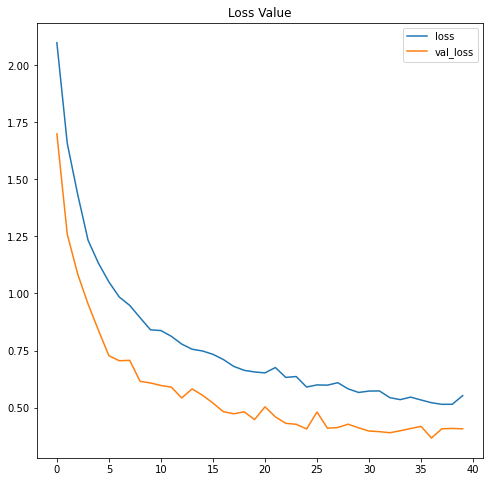

acc: 0.8180538415908813
val_acc: 0.8705440759658813


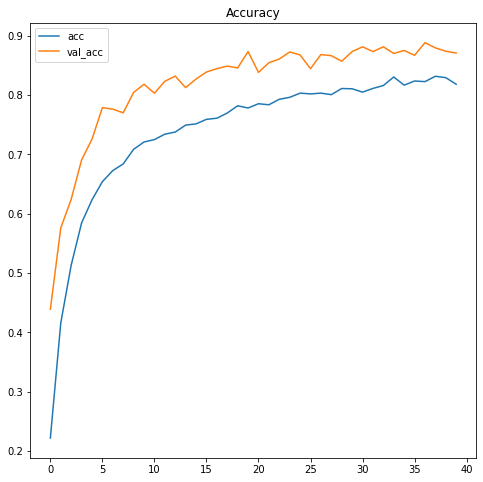

In [31]:
plt.figure(figsize=(8,8))
plt.title('Loss Value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
print('loss:', history.history['loss'][-1])
print('val_loss:', history.history['val_loss'][-1])
plt.show()

plt.figure(figsize=(8,8))
plt.title('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
print('acc:', history.history['acc'][-1])
print('val_acc:', history.history['val_acc'][-1])
plt.show()

In [34]:
predictions = model.predict(X_test)

In [38]:
predictions = np.argmax(predictions, axis=1)
y_test = one_hot_encoder.inverse_transform(y_test)

Using the confusion matrix above, we are able to know which class makes our CNN confused.

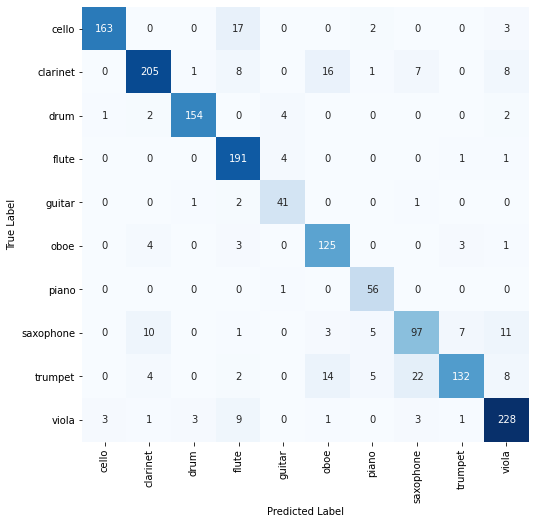

In [39]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Now we will check the model on 1 min audio with Viola, Clarinet and Piano.

In [40]:
df_test = pd.read_csv('/content/drive/MyDrive/deepLearning/project/testing.csv')
df_test = df_test.iloc[: , 1:]

df_test

,fname
0,chunk_000.wav
1,chunk_001.wav
2,chunk_002.wav
3,chunk_003.wav
4,chunk_004.wav
...,...
330,chunk_330.wav
331,chunk_331.wav
332,chunk_332.wav
333,chunk_333.wav


In [41]:
!unzip /content/drive/MyDrive/deepLearning/project/1min.zip -d /content/min1/

Archive:  /content/drive/MyDrive/deepLearning/project/1min.zip
   creating: /content/min1/1min/
  inflating: /content/min1/1min/chunk_000.wav  
  inflating: /content/min1/1min/chunk_001.wav  
  inflating: /content/min1/1min/chunk_002.wav  
  inflating: /content/min1/1min/chunk_003.wav  
  inflating: /content/min1/1min/chunk_004.wav  
  inflating: /content/min1/1min/chunk_005.wav  
  inflating: /content/min1/1min/chunk_006.wav  
  inflating: /content/min1/1min/chunk_007.wav  
  inflating: /content/min1/1min/chunk_008.wav  
  inflating: /content/min1/1min/chunk_009.wav  
  inflating: /content/min1/1min/chunk_010.wav  
  inflating: /content/min1/1min/chunk_011.wav  
  inflating: /content/min1/1min/chunk_012.wav  
  inflating: /content/min1/1min/chunk_013.wav  
  inflating: /content/min1/1min/chunk_014.wav  
  inflating: /content/min1/1min/chunk_015.wav  
  inflating: /content/min1/1min/chunk_016.wav  
  inflating: /content/min1/1min/chunk_017.wav  
  inflating: /content/min1/1min/chunk_01

In [44]:
test_path = '/content/min1/1min/'

test_audio_data = list()
for i in tqdm(range(df_test.shape[0])):
    test_audio_data.append(librosa.load(test_path+df_test['fname'].iloc[i]))
    
test_audio_data = np.array(test_audio_data)


100%|██████████| 335/335 [00:18<00:00, 17.94it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [45]:
df_test['audio_waves'] = test_audio_data[:,0]
df_test['samplerate'] = test_audio_data[:,1]
df_test

,fname,audio_waves,samplerate
0,chunk_000.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
1,chunk_001.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050
2,chunk_002.wav,"[-0.002626382, -0.00025308758, 0.004615882, 0....",22050
3,chunk_003.wav,"[0.0008622331, 0.0064486815, 0.013185791, 0.01...",22050
4,chunk_004.wav,"[0.047615565, 0.068864636, 0.05820354, 0.06383...",22050
...,...,...,...
330,chunk_330.wav,"[-0.010808276, -0.017071744, -0.015257926, -0....",22050
331,chunk_331.wav,"[-0.0024912164, -0.0043831714, -0.0046724584, ...",22050
332,chunk_332.wav,"[-0.0037650727, -0.005780294, -0.0051368373, -...",22050
333,chunk_333.wav,"[3.3638484e-05, -4.3166224e-06, 3.3990455e-06,...",22050


In [46]:
bit_lengths = list()
for i in range(df_test.shape[0]):
    bit_lengths.append(len(df_test['audio_waves'].iloc[i]))
    
bit_lengths = np.array(bit_lengths)

df_test['bit_lengths'] = bit_lengths
df_test['seconds_length'] = df_test['bit_lengths']/df_test['samplerate']

df_test.head()

,fname,audio_waves,samplerate,bit_lengths,seconds_length
0,chunk_000.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,22050,1
1,chunk_001.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",22050,22050,1
2,chunk_002.wav,"[-0.002626382, -0.00025308758, 0.004615882, 0....",22050,22050,1
3,chunk_003.wav,"[0.0008622331, 0.0064486815, 0.013185791, 0.01...",22050,22050,1
4,chunk_004.wav,"[0.047615565, 0.068864636, 0.05820354, 0.06383...",22050,22050,1


In [47]:
g_audio_waves = list()

for i in tqdm(range(df_test.shape[0])):
    try:
      g_audio_waves.append(df_test.iloc[i]['audio_waves'][0:22050])
        
    except ValueError:
        continue

g_audio_waves = np.array(g_audio_waves)


100%|██████████| 335/335 [00:00<00:00, 5324.74it/s]


In [48]:
t_mfcc_features = list()

for i in tqdm(range(len(g_audio_waves))):
    t_mfcc_features.append(mfcc(g_audio_waves[i]))
    
t_mfcc_features = np.array(t_mfcc_features)

100%|██████████| 335/335 [00:02<00:00, 165.90it/s]


In [ ]:
t_input_shape = (t_mfcc_features.shape[1], t_mfcc_features.shape[2], 1)


(137, 13, 1)

In [49]:
X_train = t_mfcc_features.reshape(t_mfcc_features.shape[0], t_mfcc_features.shape[1], t_mfcc_features.shape[2], 1)
print(X_train.shape)

(335, 137, 13, 1)


In [71]:
predictions = model.predict(X_train)


In [72]:
for i in predictions:
  for j in i:
    print(("%.5f" % j).rstrip('0').rstrip('.'),end=' ')
  print()

0 0 0 0 0 0 1 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 0 
0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 1 0 0 0 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 1 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 0.98203 0 0 0 0.01797 0 0 0 0 
0 0 0 0 0 0 0 0 1 0 
0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 0 
0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 1 0 0 0 0 
0 0 0 0 0 0 0 0 1 0 
0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 0 
0 1 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0.23037 0 0 

In [73]:
list_instruments = ['cello','clarinet','drum','flute','guitar','oboe','piano','saxophone','trumpet','viola']
predictions= pd.DataFrame(predictions)
predictions.columns = list_instruments
predictions

,cello,clarinet,drum,flute,guitar,oboe,piano,saxophone,trumpet,viola
0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.0,0.0,4.929706e-38,0.0
1,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0
2,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0
3,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...
330,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0
331,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0
332,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0
333,0.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0


In [74]:
for col in list_instruments:
  if predictions[col].sum()==0:
    predictions=predictions.drop(columns=col)
predictions

,clarinet,oboe,piano,trumpet
0,0.0,0.000000e+00,1.0,4.929706e-38
1,1.0,0.000000e+00,0.0,0.000000e+00
2,1.0,0.000000e+00,0.0,0.000000e+00
3,1.0,0.000000e+00,0.0,0.000000e+00
4,0.0,0.000000e+00,0.0,1.000000e+00
...,...,...,...,...
330,1.0,0.000000e+00,0.0,0.000000e+00
331,1.0,0.000000e+00,0.0,0.000000e+00
332,1.0,0.000000e+00,0.0,0.000000e+00
333,1.0,0.000000e+00,0.0,0.000000e+00


In [75]:
for colname in predictions.columns:
  predictions.loc[predictions[colname] >=0.1, colname] = 1
  predictions.loc[predictions[colname] <0.1, colname] = 0

This code display the result: 

each row display an instrument. The x present the time


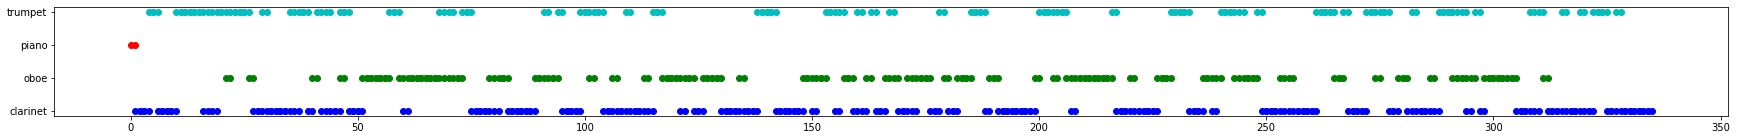

clarinet:  [1, 2, 3, 6, 7, 8, 9, 16, 18, 27, 28, 30, 31, 32, 33, 34, 36, 39, 42, 44, 45, 48, 49, 50, 60, 75, 76, 77, 78, 80, 83, 84, 85, 86, 87, 88, 95, 96, 97, 98, 104, 105, 107, 108, 110, 111, 112, 114, 121, 124, 125, 130, 131, 132, 133, 135, 136, 137, 142, 143, 144, 145, 146, 147, 150, 155, 159, 161, 164, 165, 169, 170, 172, 176, 177, 180, 181, 188, 191, 192, 193, 194, 195, 196, 197, 198, 207, 217, 218, 219, 221, 222, 223, 224, 225, 233, 234, 235, 238, 249, 250, 251, 252, 254, 256, 257, 258, 259, 260, 268, 269, 270, 271, 277, 278, 281, 283, 284, 285, 287, 294, 297, 305, 306, 307, 309, 312, 313, 314, 316, 317, 318, 320, 321, 325, 326, 328, 329, 330, 331, 332, 333, 334]
oboe:  [21, 26, 40, 46, 51, 52, 53, 54, 55, 56, 59, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 79, 81, 82, 89, 90, 92, 93, 101, 106, 113, 117, 118, 119, 120, 122, 123, 126, 127, 128, 129, 134, 148, 149, 151, 152, 157, 158, 162, 166, 168, 171, 173, 174, 175, 179, 182, 183, 184, 189, 190, 199, 203, 206, 208, 209, 210, 211, 

In [76]:
def showSongTimeline(predictions):
  colors = ['b','g','r','c','m','y','k']
  dictTime = {}
  for i in predictions.columns:
    dictTime[i]=[]
  
  for i in range(predictions.shape[0]):
    filter_col = [col for col in predictions if predictions[col].iloc[i]==1]
    for j in filter_col:
      dictTime[j].append(i)
  plt.figure(figsize=(30,0.5*len(dictTime.keys())))
  ind =0
  for instrument in dictTime:
    for sec in dictTime[instrument]:
        plt.plot([sec,sec+1],[instrument,instrument], colors[ind%7]+'o-')

    ind=ind+1
  plt.show()
  return dictTime


d = showSongTimeline(predictions)
for i in d:
  print(i,d[i],sep=":  ")